<a href="https://colab.research.google.com/github/sanamsabooni/Thesis_ErrorDetection/blob/main/Thesis_ErrorDetection_TMC2209_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')
directory_path = "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive


In [ ]:
#combining .xlsx files to a single csv
#################################################################################################
########################### Skip if you are not combining .xlsx files ###########################
#################################################################################################
#### We have a big fil of data collected from hardware and we need a single file to analyse #####
#################################################################################################



#setting directory path
#TMC2209
directory_path = "/content/drive/My Drive/Colab Notebooks/TMC2209SanamFormatOnly"

#Building a list to store the excel file from the directory path above
file_list = []

# Loop through the directory and add .xlsx files to the list
for file in os.listdir(directory_path):
    if file.endswith(".xlsx"):
        file_list.append(file)

# Print the names of the files in the list
for file_name in file_list:
    print(file_name)

Jupyter_BS_1_TMC2209_32_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_TMC2209_16_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_1_TMC2209_8_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_1_TMC2209_64_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_1_TMC2209_16_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_TMC2209_64_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_4_TMC2209_16_5.0mm_500rpm_4000rpms_.xlsx
Jupyter_BS_3_TMC2209_16_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_3_TMC2209_8_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_TMC2209_32_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_3_TMC2209_32_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_2_TMC2209_8_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_3_TMC2209_64_5.0mm_12rpm_4000rpms_.xlsx
Jupyter_BS_4_TMC2209_32_5.0mm_500rpm_4000rpms_.xlsx
Jupyter_BS_4_TMC2209_16_5.0mm_60rpm_4000rpms_.xlsx
Jupyter_BS_5_TMC2209_16_5.0mm_60rpm_4000rpms_.xlsx
Jupyter_BS_5_TMC2209_64_5.0mm_500rpm_4000rpms_.xlsx
Jupyter_BS_5_TMC2209_8_5.0mm_500rpm_4000rpms_.xlsx
Jupyter_BS_4_TMC2209_64_5.0mm_500rpm_4000rpms_.xlsx
Jupyter_BS_4_TMC2209_64_5.0mm_

In [ ]:
#combine all .xlsx files in the specified directory into a single data frame
dfs = []

for file in os.listdir(directory_path):
    if file.endswith('.xlsx'):
        file_path = os.path.join(directory_path, file)
        df = pd.read_excel(file_path)
        dfs.append(df)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default sty

In [ ]:
#Save single(giant) data frame as csv
giant_df = pd.concat(dfs, ignore_index=True)
giant_file_path = os.path.join(directory_path, 'TMC2209.csv')
giant_df.to_csv(giant_file_path, index=False)

In [ ]:
# Setting the path name to the csv
file_name = "TMC2209.csv"

In [ ]:
##########################################################################################################################
################################## start from here if you are not combining .xlsx files ##################################
##########################################################################################################################
data_b = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TMC2209.csv')

In [ ]:
#Data shape, types, description
print(data_b.shape)
print(data_b.dtypes)
print(data_b.describe())
print(data_b)

(3130589, 6)
commanded position      float64
theoretical position    float64
actual position         float64
error actual            float64
error theoretical       float64
time                    float64
dtype: object
       commanded position  theoretical position  actual position  \
count        3.130589e+06          3.130589e+06     3.130589e+06   
mean         8.188550e+01          8.170928e+01     8.189899e+01   
std          8.428358e+01          8.427655e+01     8.429362e+01   
min         -3.125000e-03         -3.057861e-01    -3.000000e-03   
25%          1.969219e+01          1.938416e+01     1.969800e+01   
50%          4.501289e+01          4.500000e+01     4.503300e+01   
75%          1.273500e+02          1.271918e+02     1.273800e+02   
max          3.000000e+02          2.996967e+02     3.000010e+02   

       error actual  error theoretical          time  
count  3.130589e+06       3.130589e+06  3.130589e+06  
mean   1.348925e-02      -1.762195e-01  6.284103e+01  
std

In [ ]:
#data preprocessing

# Dropping "time" and error "theoretical columns"
for i in range(2):
    data_b.drop(data_b.columns[len(data_b.columns)-1], axis=1, inplace = True)

In [ ]:
# rename 'error actual' as 'error'(output)
datab = data_b.rename(columns={'error actual':'error'}, inplace=True)

In [ ]:
########################## making 10% sample dataset ##################################
data_b = data_b.sample(frac=0.1, random_state=42)

In [ ]:
#cleaning data(there was a data point far away from the rest of dataset)
# Drop the row where 'error' is 32.77
data_b = data_b[data_b['error'] <= 20]

In [ ]:
# Extract the features (X) and target (Y) for ballscrew
X_b = data_b.iloc[:, :-1].values  # Use all columns except the last one as features
Y_b = data_b.iloc[:, -1].values  # Use the last column as the target

In [ ]:
# Checking skewness
check_skew = (data_b.skew(axis=0, skipna=True, numeric_only=True))
print(check_skew)

commanded position      1.162754
theoretical position    1.162877
actual position         1.162478
error                   0.477539
dtype: float64


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fit = std_scaler.fit(data_b)
output = std_scaler.transform(data_b)
data_b = pd.DataFrame(output, columns=data_b.columns, index=list(data_b.index.values))

In [ ]:
# Detecting outliers
def detect_outlier(column):
    """
    Detects outliers in a pandas series and returns their indices.
    """
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return column[(column < lower_bound) | (column > upper_bound)].index

# List to hold indices of rows with outliers
outlier_indices = []

# Detecting outliers in each column and adding their indices to the list
for i in data_b.columns:
    outlier_idx = detect_outlier(data_b[i])
    outlier_indices.extend(outlier_idx)

# Removing duplicates in the list of indices
outlier_indices = list(set(outlier_indices))

# Deleting rows with outliers
data_b = data_b.drop(outlier_indices)

In [ ]:
# Checking outliers
for feature in data_b.columns:
    outlier = detect_outlier(data_b[feature])
    print('Name of column: '+ feature)
    print('Number of outliers: '+ str(len(outlier)))
    print('Max outlier value: '+ str(outlier.max()))
    print('Min outlier value: '+ str(outlier.min()))
    print('\n')

Name of column: commanded position
Number of outliers: 134740
Max outlier value: 2261742
Min outlier value: 739281


Name of column: theoretical position
Number of outliers: 135354
Max outlier value: 2261779
Min outlier value: 739278


Name of column: actual position
Number of outliers: 134574
Max outlier value: 2261735
Min outlier value: 739283


Name of column: error
Number of outliers: 6576
Max outlier value: 2193617
Min outlier value: 733045




In [ ]:
# Normalize the data
scaler_X_b = MinMaxScaler()
scaler_Y_b = MinMaxScaler()
X_b = scaler_X_b.fit_transform(X_b)
Y_b = scaler_Y_b.fit_transform(Y_b.reshape(-1, 1))

In [ ]:
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_b, Y_b, test_size=0.2, random_state=42)

Epoch 1/50
62612/62612 [==============================] - 191s 3ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 2/50
62612/62612 [==============================] - 179s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 3/50
62612/62612 [==============================] - 157s 3ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 4/50
62612/62612 [==============================] - 178s 3ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 5/50
62612/62612 [==============================] - 156s 2ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 6/50
62612/62612 [==============================] - 158s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 7/50
62612/62612 [==============================] - 157s 3ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 8/50
62612/62612 [==============================] - 178s 3ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 9/50
62612/62612 [==============================] - 178s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 10/50
62612/62612 [=====================

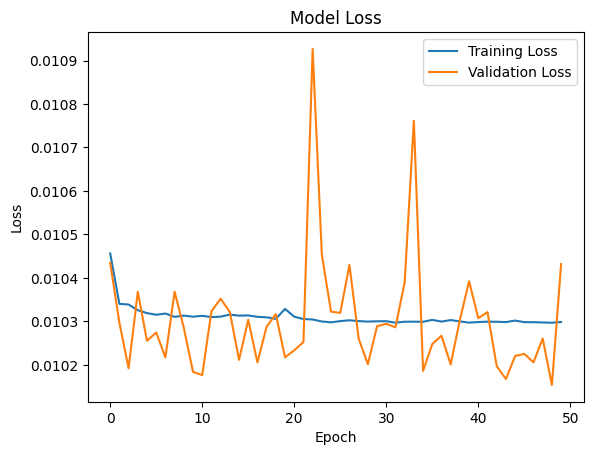

In [ ]:
############################ entire dataset with tanh activation but without regularization for sample dataset ##########################
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

# Compile the model with a specific learning rate
custom_optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

# Train the model and save the history
# epoch 10 was overtraining the model, 8 would be the best
history = model.fit(X_train_b, Y_train_b, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


Epoch 1/50
62612/62612 [==============================] - 172s 3ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 2/50
62612/62612 [==============================] - 159s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 3/50
62612/62612 [==============================] - 157s 3ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 4/50
62612/62612 [==============================] - 178s 3ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 5/50
62612/62612 [==============================] - 157s 3ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 6/50
62612/62612 [==============================] - 157s 3ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 7/50
62612/62612 [==============================] - 158s 3ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 8/50
62612/62612 [==============================] - 158s 3ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 9/50
62612/62612 [==============================] - 158s 3ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 10/50
62612/62612 [=====================

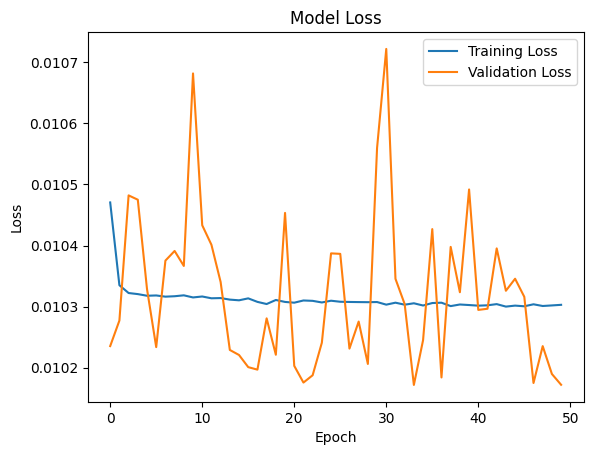

In [ ]:
############################ entire dataset with tanh activation but without regularization ##########################
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='tanh'))  # Assuming it's a regression task with one output

# Compile the model with a specific learning rate
custom_optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

# Train the model and save the history
# epoch 10 was overtraining the model, 8 would be the best
history = model.fit(X_train_b, Y_train_b, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

19567/19567 [==============================] - 32s 2ms/step
MSE on training data: 0.0101593992851229
MSE on testing data: 0.01014281008273565


Epoch 1/50
62612/62612 [==============================] - 194s 3ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 2/50
62612/62612 [==============================] - 168s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 3/50
62612/62612 [==============================] - 166s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 4/50
62612/62612 [==============================] - 168s 3ms/step - loss: 0.0102 - val_loss: 0.0102
Epoch 5/50
62612/62612 [==============================] - 166s 3ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 6/50
62612/62612 [==============================] - 167s 3ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 7/50
62612/62612 [==============================] - 186s 3ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 8/50
62612/62612 [==============================] - 185s 3ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 9/50
62612/62612 [==============================] - 187s 3ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 10/50
62612/62612 [=====================

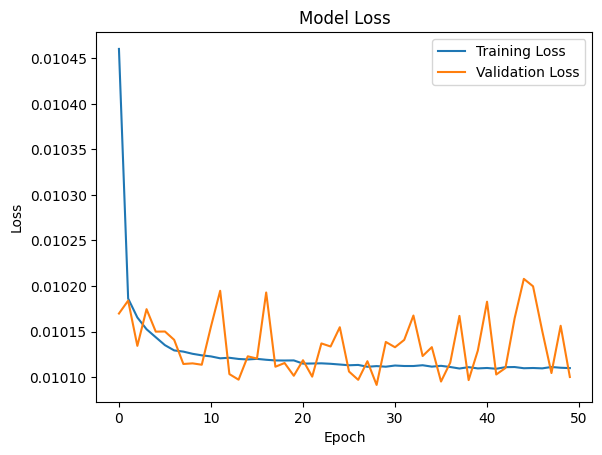

In [ ]:
########################################### running till morning and relu activation without regularization ############################################
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming it's a regression task with one output

# Compile the model with a specific learning rate
custom_optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

# Train the model and save the history
# epoch 10 was overtraining the model, 8 would be the best
history = model.fit(X_train_b, Y_train_b, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

19567/19567 [==============================] - 33s 2ms/step
MSE on training data: 0.010083743842514906
MSE on testing data: 0.010067801611591343


Epoch 1/50
9615/9615 [==============================] - 39s 4ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 2/50
9615/9615 [==============================] - 28s 3ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 3/50
9615/9615 [==============================] - 32s 3ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 4/50
9615/9615 [==============================] - 30s 3ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 5/50
9615/9615 [==============================] - 29s 3ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 6/50
9615/9615 [==============================] - 28s 3ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 7/50
9615/9615 [==============================] - 32s 3ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 8/50
9615/9615 [==============================] - 32s 3ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 9/50
9615/9615 [==============================] - 31s 3ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 10/50
9615/9615 [==============================] - 29s 3ms/step - l

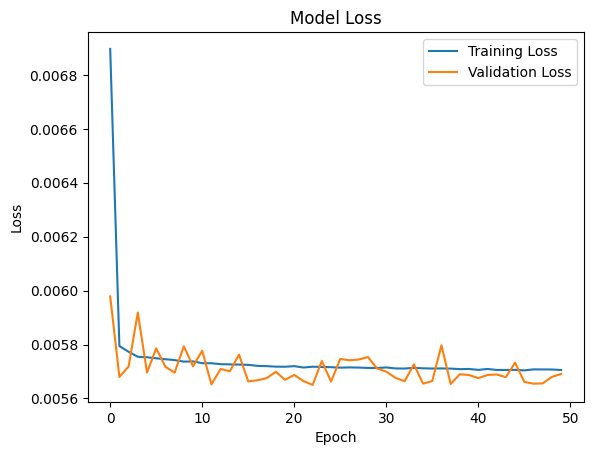

In [ ]:
########################################### 10% small chunk and relu activation without regularization ############################################
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the neural network
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming it's a regression task with one output

# Compile the model with a specific learning rate
custom_optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

# Train the model and save the history
# epoch 10 was overtraining the model, 8 would be the best
history = model.fit(X_train_b, Y_train_b, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

3005/3005 [==============================] - 5s 2ms/step
MSE on training data: 0.0057111799332085515
MSE on testing data: 0.005726013789784838


Epoch 1/50
62612/62612 [==============================] - 170s 3ms/step - loss: 0.0182 - val_loss: 0.0171
Epoch 2/50
62612/62612 [==============================] - 183s 3ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 3/50
62612/62612 [==============================] - 160s 3ms/step - loss: 0.0170 - val_loss: 0.0171
Epoch 4/50
62612/62612 [==============================] - 162s 3ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 5/50
62612/62612 [==============================] - 163s 3ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 6/50
62612/62612 [==============================] - 160s 3ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 7/50
62612/62612 [==============================] - 162s 3ms/step - loss: 0.0170 - val_loss: 0.0171
Epoch 8/50
62612/62612 [==============================] - 185s 3ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 9/50
62612/62612 [==============================] - 161s 3ms/step - loss: 0.0170 - val_loss: 0.0170
Epoch 10/50
62612/62612 [=====================

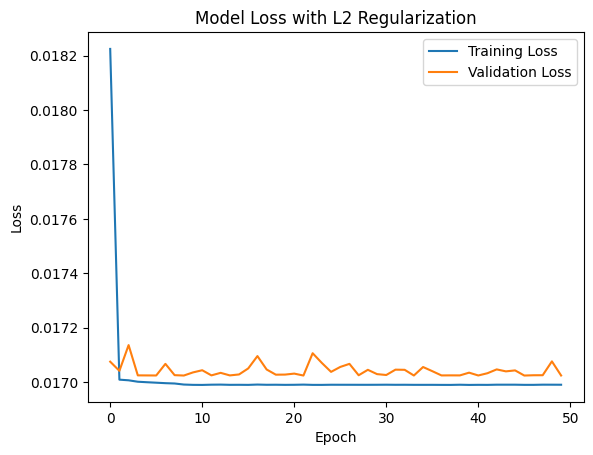

In [ ]:
############################################# The entire dataset with regularization##############################
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.regularizers import l2

# Define the neural network with L2 regularization
model = Sequential()
model.add(Dense(8, input_dim=X_b.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(12, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))  # Assuming it's a regression task with one output

# Compile the model with a specific learning rate
custom_optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=custom_optimizer)

# Train the model and save the history
# epoch 10 was overtraining the model, 8 would be the best
history = model.fit(X_train_b, Y_train_b, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
MSE_train_b = np.mean(np.square(model.predict(X_train_b) - Y_train_b))
MSE_test_b = np.mean(np.square(model.predict(X_test_b) - Y_test_b))
print('MSE on training data:', MSE_train_b)
print('MSE on testing data:', MSE_test_b)

19567/19567 [==============================] - 32s 2ms/step
MSE on training data: 0.01698835982471816
MSE on testing data: 0.016979154771125705


In [ ]:
data_b.shape

(4349161, 4)

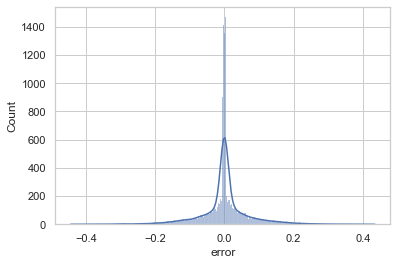

In [ ]:
#Histogram
sns.histplot(data_l['error'], kde=True)
plt.show()

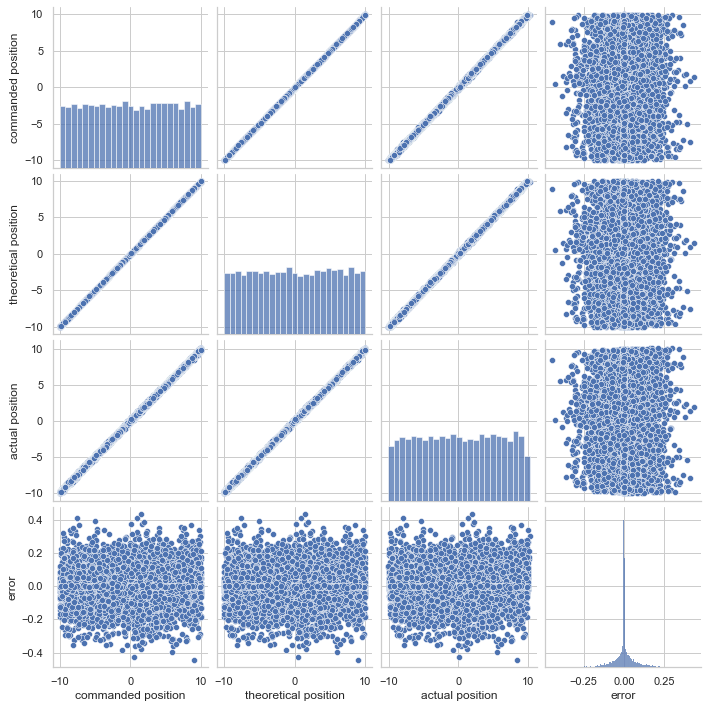

In [ ]:
# Seaborn Pair Plot
sns.pairplot(data_l)
plt.show()

In [ ]:
!pip install google-cloud-bigquery

In [ ]:
!pip install pandas-gbq

   ---------------------------------------- 190.9/190.9 kB 3.8 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.0 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.1.0 which is incompatible.
tensorboard 2.11.0 requires protobuf<4,>=3.9.2, but you have protobuf 4.25.1 which is incompatible.
tensorflow-intel 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.1 which is incompatible.


   ---------------------------------------- 24.6/24.6 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6


In [ ]:
import numpy as np
import pandas as pd

from google.cloud import bigquery
from google.oauth2 import service_account

# Replace 'your_project' and 'your_dataset' with your project ID and dataset ID
project_id = 'level-footing-406016'
dataset_id = 'level-footing-406016.file1_sample_ds'

# Replace 'your_table' with your table ID
table_id = 'samples'

# Replace 'path/to/your/csv/file.csv' with the path to your CSV file
excel_file_path = 'C:\\Users\\Sanam\\Downloads\\A4988SanamFormatOnly\\A4988SanamFormatOnly\\Jupyter_BS_1_A4988_1_5.0mm_12rpm_4000rpms_.xlsx'

# Read xlsx file
df = pd.read_excel(excel_file_path)

# Save the DataFrame to a CSV file
csv_file_path = 'C:\\Users\\Sanam\\Downloads\\A4988SanamFormatOnly\\A4988SanamFormatOnly\\Jupyter_BS_1_A4988_1_5.0mm_12rpm_4000rpms_.csv'
df.to_csv(csv_file_path, index=False)

# Replace 'path/to/your/credentials.json' with the actual path to your JSON key file
credentials_path = 'C:\\Users\\Sanam\\Downloads\\level-footing-406016-0b81de67bdd9.json'

# Explicitly create credentials
credentials = service_account.Credentials.from_service_account_file(credentials_path)

# Set up the BigQuery client with explicit credentials
client = bigquery.Client(credentials=credentials)

# Get the reference to the destination table
table_ref = f"{project_id}.{dataset_id}.{table_id}"

# Write the DataFrame to BigQuery
df.to_gbq(destination_table=table_ref, project_id=project_id, if_exists='append')

print(f"Data loaded to {table_ref.project}.{table_ref.dataset_id}.{table_ref.table_id}")

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fpydata-google-auth.readthedocs.io%2Fen%2Flatest%2Foauth.html&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=oegEo9RRVuKQXfrkwHDec1QB2U7FHL&prompt=consent&access_type=offline


KeyboardInterrupt: Interrupted by user